### Only works for WR (written) question

<a href="https://colab.research.google.com/github/CISC-CMPE-327/Information/blob/master/TAs/onq_grade.ipynb" target="_parent\">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [63]:
import pandas as pd
from scipy.stats import describe


In [64]:
df = pd.read_excel('m1.xlsx') # index from 0

In [65]:
df.columns

Index(['Org Defined ID', 'Username', 'FirstName', 'LastName', 'Attempt #',
       'Attempt Start', 'Attempt End', 'Section #', 'Q #', 'Q Type', 'Q Title',
       'Q Text', 'Bonus?', 'Difficulty', 'Answer', 'Answer Match', 'Score',
       'Out Of', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [74]:
# grade question one-by-one for users in order

q1_scores = []
q1 = df.loc[df['Q #'] == 7]
q1_questions = q1['Q Text']
q1_answers = q1['Answer']

for question, answer in zip(q1_questions, q1_answers):
    # question: str - the question in text format
    # answer:   str - the answer in text format
    
    q1_scores.append(10) # set the score

# check distribution
pd.Series(q1_scores).describe()

# make sure the number of scores is the same as number of students in class
# this cell only works for WR questions, since other questions will have more than one row that has answers
# (T/F question has T answer checked/unchecked as one row, and F checked/unchecked as one row )

count    129.0
mean      10.0
std        0.0
min       10.0
25%       10.0
50%       10.0
75%       10.0
max       10.0
dtype: float64

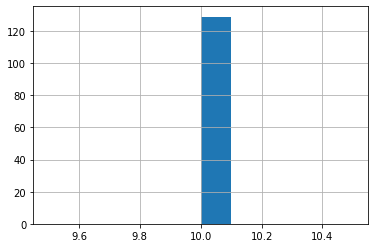

In [67]:
pd.Series(q1_scores).hist()

In [68]:
# then grade next question. here I just copy over q1_scores for q2 etc.

q2_score = q1_scores
q3_score = q1_scores
q4_score = q1_scores
q5_score = q1_scores

In [69]:
# combine as a student-question-score matrix. (each row is a student, each column is a question)

import numpy as np
m = np.column_stack((q1_scores, q2_score, q3_score, q4_score, q5_score))

In [70]:
# total score
total = m.sum(axis=-1)
print(total)

[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50]


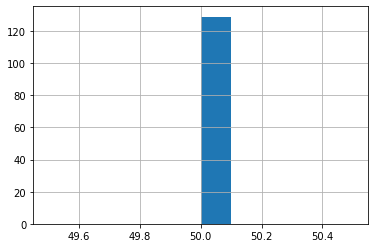

In [71]:
# summary of total
pd.Series(total).describe()
pd.Series(total).hist()

In [ ]:
df_upload = pd.DataFrame(
    {
        'OrgDefinedId':q1['Org Defined ID'], # get IDs from question 1
        'Mini-Exam #1 Points Grade': total,  # `Mini-Exam #1` should be replaced with your quizz name
        'End-of-Line Indicator': ['#']*len(total)
    })
df_upload

In [73]:
# save the score as csv for upload
df_upload.to_csv('m1.csv', index=False)